<a href="https://colab.research.google.com/github/Vladi-57/cs480student/blob/main/01/Copy_of_CS480_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

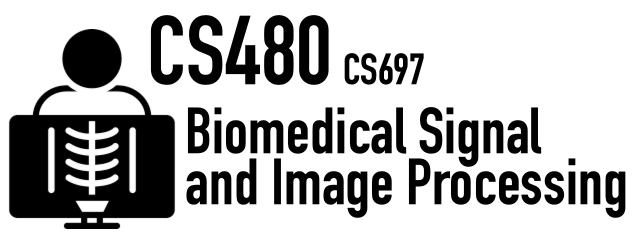
# Assignment 1


In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
from scipy.misc import electrocardiogram # scipy is a python scientific computing library
ecg = electrocardiogram() # let's load the scipy ECG dataset

In [ ]:
SAMPLING_RATE = 360 # this data was sampled with 360 Hz

**Task 1:** Plot the data in the range from 9 to 11 seconds! [30 Points]

In [ ]:
# TODO your plotting code goes here
# please take the sampling rate into account to only plot the range
# between 9 and 11 seconds

In [ ]:
print(ecg[0:10]) # the first 10 value
print(ecg[0:10:2]) # everything 2nd numbers

[-0.245 -0.215 -0.185 -0.175 -0.17  -0.17  -0.185 -0.17  -0.16  -0.15 ]
[-0.245 -0.185 -0.17  -0.185 -0.16 ]


In [ ]:
firstsecond= ecg[:SAMPLING_RATE]# the first 360 value of the ecg singal

In [ ]:
secondsecond=ecg[1*SAMPLING_RATE: 2* SAMPLING_RATE] # the 2nd second of the sinal


In [ ]:
thirdsecond=ecg[2*SAMPLING_RATE: 3 * SAMPLING_RATE]  # the 3rd second of the sinal


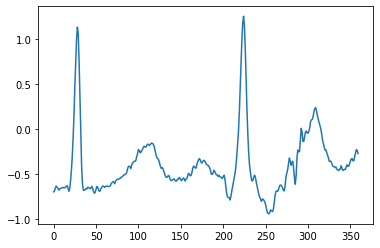

In [ ]:
plt.plot(thirdsecond)

In [ ]:
from9to11 = ecg[8*SAMPLING_RATE: 11 *SAMPLING_RATE]

In [ ]:
len(from9to11)

1080

Text(0.5, 0, 'time')

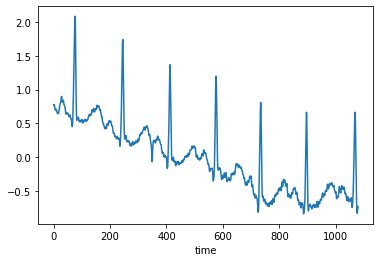

In [ ]:
plt.plot(from9to11) 
plt.xlabel("time")
#keep from 9-11

**Task 2:** Use Neurokit to detect the R spikes! [30 Points]

In [ ]:
# now can you see the P Q R S T waves? it's actually a pretty good signal despite
# the shift in the baseline

In [ ]:
# we now need to install the neurokit2 library
!pip install neurokit2
import neurokit2 as nk

     |████████████████████████████████| 1.1 MB 5.0 MB/s 


In [ ]:
# we can use neurokit's function to detect the R spikes
_, rpeaks = nk.ecg_peaks(ecg, sampling_rate=SAMPLING_RATE)

In [ ]:
# look at rpeaks - the numbers indicate the samples that are R spikes
print(rpeaks['ECG_R_Peaks'][0:10]) # here only the first ten

[ 125  343  552  748  944 1130 1317 1501 1691 1880]


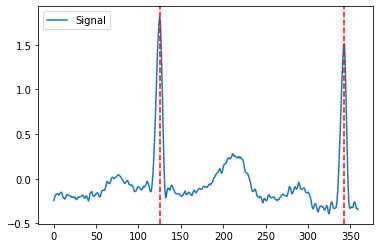

In [ ]:
# you can also plot the first two detected R spikes
plot = nk.events_plot(rpeaks['ECG_R_Peaks'][0:2], ecg[0:SAMPLING_RATE])

In [ ]:
# TODO Can you write code to plot the R spikes between 9 and 11 seconds?
# Hint: one solution could be to just detect peaks in the range you specified for Task 1
# Hint 2: you might need to extend the range by +- 1 second to see the five peaks from Task 1

In [ ]:
print(rpeaks['ECG_R_Peaks'][8:11]) # just playing around with it

[1691 1880 2065]


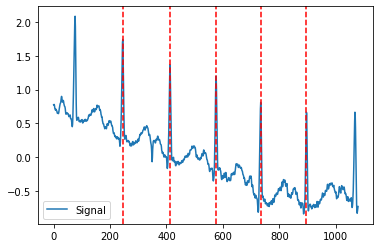

In [54]:
_, rpeaks9to11 = nk.ecg_peaks(from9to11,sampling_rate=SAMPLING_RATE) #from9-11 in task 1 using from above
plot = nk.events_plot(rpeaks9to11['ECG_R_Peaks'],from9to11)

**Task 3:** Detect Heartrate. [15 Points]

In [ ]:
# TODO Does the patient have a regular heart rate? If yes, which one? (estimate is fine)
# Hint: you can use the rpeaks for that 

In [ ]:
# base on the lecture6 slide from cs480 it look that the patient have more of a iregular heartbeat.
# so it doesn't look like it have a regular heart rate. 
#source: https://slides.com/haehn/cs480_lecture05#/18 

**Task 4:** Detect P Q S T Peaks. [25 Points]

In [ ]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the range of 9 to 11 seconds?
# Hint: Look at the tutorial: https://neurokit2.readthedocs.io/en/latest/examples/ecg_delineate.html#Locate-other-waves-(P,-Q,-S,-T)-and-their-onset-and-offset
# Hint 2: The plot will have blue, orange, green, and red circles :)

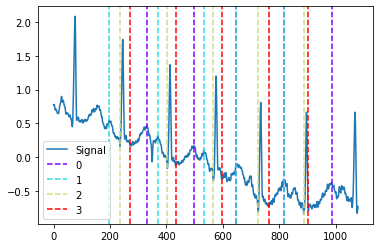

In [67]:
# TODO Does the detection work well?
_, waves_peak = nk.ecg_delineate(from9to11, rpeaks9to11, sampling_rate=SAMPLING_RATE, method="peak")
P_waves = waves_peak['ECG_P_Peaks'] #source from the tutorial link above
Q_waves = waves_peak['ECG_Q_Peaks'] #source from the tutorial link above
S_waves = waves_peak['ECG_S_Peaks'] #source from the tutorial link above
T_waves = waves_peak['ECG_T_Peaks'] #source from the tutorial link above
plot= nk.events_plot([T_waves, P_waves, Q_waves, S_waves], from9to11)
#it look like it detect well for me but instead of circles i just blue, red,purple,etc colors
#the color that was showng above to be seen "blue,orange green and red circle" only a few of them were shown
#so from my point of view it look like it detect but from hint2 I feel like it not shown correctly so its like half half
#it detected but not  display properly

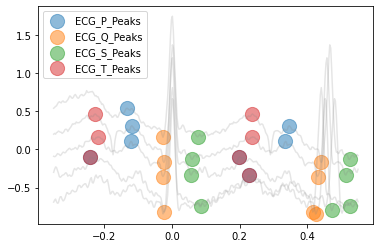

In [124]:
#aaryaman help me fix by showing the  circle, I was missing "show = True and show_type='peaks'"
_, waves_peak = nk.ecg_delineate(from9to11, rpeaks9to11, sampling_rate=SAMPLING_RATE, method="peak", show= True, show_type='peaks')
#from what i've  seen it seem to be dectecting pretty good.

**Bonus Task:** Detect P Q S T Peaks for the full signal before and after filtering. [33 Points]

In [ ]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal
# Hint: For plotting, 1000 samples / 5 rpeaks gives a nice overview.

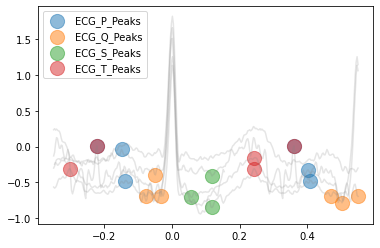

In [104]:
sampleto1000=ecg[:1000]
_, rpeaks = nk.ecg_peaks(sampleto1000, sampling_rate=SAMPLING_RATE) 
_, waves_peak = nk.ecg_delineate(ecg[:1000], rpeaks, sampling_rate=SAMPLING_RATE, method="peak", show = True, show_type='peaks')


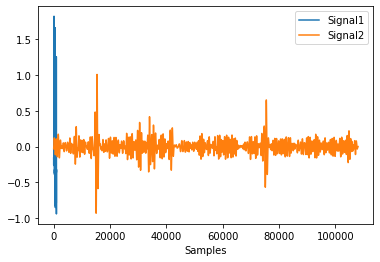

In [119]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass. 
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.
filter =nk.signal_filter(ecg, lowcut=1, highcut=2)
plot = nk.signal_plot([sampleto1000,filter])


In [ ]:
# TODO Does the filtering improve the result?
#it didn't improve for  me maybe because I did it wrong.

In [ ]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#